In [1]:
import random

import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
anime = pd.read_csv("C:\\Users\\Sumanth Shan\\Downloads\\archive\\anime.csv")
ratings = pd.read_csv("C:\\Users\\Sumanth Shan\\Downloads\\archive\\rating.csv")

anime = anime.dropna()
anime = anime[anime["episodes"].str.contains("Unknown") == False]

In [6]:
data = pd.merge(ratings, anime, on='anime_id')
data = data.dropna()
data = data.drop('rating_y', axis=1)
data.rename(columns = {'rating_x':'rating'}, inplace = True)
data = data[data['rating'] != -1]
data

,user_id,anime_id,rating,name,genre,type,episodes,members
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
5,21,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
6,28,20,9,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
7,34,20,9,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
...,...,...,...,...,...,...,...,...
7813600,65175,30095,7,Qi Cai Lao Fu Zi,"Action, Comedy, Seinen",Movie,1,82
7813601,65175,30096,7,Lao Fu Zi Shui Hu Chuan,"Comedy, Historical, Seinen",Movie,1,65
7813602,65682,30450,8,Dr. Slump: Hoyoyo! Arale no Himitsu Dai Koukai...,"Comedy, Sci-Fi, Shounen",Special,1,248
7813603,69497,33484,10,Shiroi Zou,"Action, Historical, Kids",Movie,1,45


In [7]:
dirty_genre_list = list(set(data.genre))
genre_list = list(set([g for x in dirty_genre_list for g in x.split(', ')]))
pd.Series(genre_list)

0              Kids
1         Adventure
2           Samurai
3              Yaoi
4           Fantasy
5     Psychological
6          Thriller
7            Demons
8            Seinen
9          Dementia
10       Shounen Ai
11             Cars
12           Police
13          Romance
14             Yuri
15           Comedy
16        Shoujo Ai
17           Shoujo
18         Military
19            Drama
20           School
21           Action
22     Supernatural
23             Game
24           Parody
25          Shounen
26       Historical
27           Sports
28          Vampire
29           Hentai
30            Harem
31           Horror
32            Ecchi
33     Martial Arts
34      Super Power
35    Slice of Life
36            Music
37           Sci-Fi
38            Space
39            Magic
40            Mecha
41            Josei
42          Mystery
dtype: object

In [8]:
stats_df = pd.DataFrame(columns=['Жанр', 'Число фильмов'])
stats_df['Жанр'] = genre_list
stats_df['Число фильмов'] = 0

for g in list(set(data.genre)):
    for genre in g.split(', '):
        stats_df.loc[stats_df['Жанр'] == genre, 'Число фильмов'] += 1
    
stats_df = stats_df.sort_values(by='Число фильмов', ascending=False)

In [9]:
stats_df

,Жанр,Число фильмов
15,Comedy,1221
21,Action,1134
37,Sci-Fi,803
19,Drama,795
1,Adventure,779
4,Fantasy,761
13,Romance,744
25,Shounen,636
22,Supernatural,567
20,School,453


<AxesSubplot:xlabel='Жанр'>

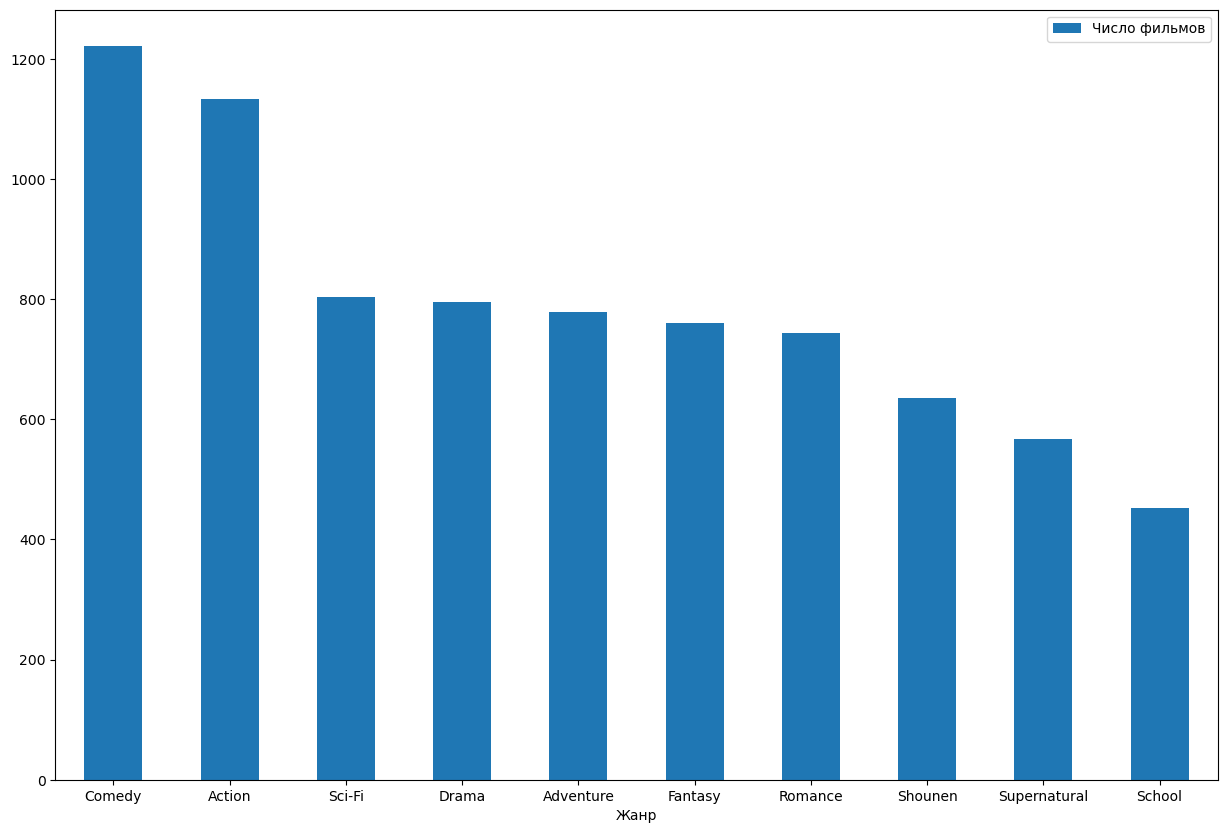

In [10]:
stats_df.set_index('Жанр').head(10).plot(kind='bar', figsize=(15, 10), rot=0)

In [11]:
#Finding the average anime rating
#The dataset provides data on people's reviews of different anime, you can use this and find the average value for each title

mean_df = pd.DataFrame(columns=['Фильм', 'Средняя оценка'])
mean_df['Фильм'] = list(set(data['name']))
mean_df['Средняя оценка'] = list(data.groupby('name')['rating'].mean().round(2))
mean_df = mean_df.sort_values(by='Средняя оценка', ascending=False)
mean_df

,Фильм,Средняя оценка
7630,Saishuu Shiken Kujira,10.0
9397,Hishoka Drop The Animation,10.0
6840,Momoiro no Crayon,10.0
5489,Shin Hikari Shinwa: Palutena no Kagami,10.0
4329,Shin Megami Tensei Devil Children: Light &amp;...,10.0
...,...,...
4662,RahXephon Specials,1.0
9704,DPR Special Movie,1.0
6163,New Initial D Movie: Legend 2 - Tousou,1.0
149,Haja Taisei Dangaiou,1.0


In [12]:
#Anime rating prediction
#The dataset contains a small number of features (genre, type, episodes, members), based on which you can try to predict a person’s review. Let's introduce the target variable
target_variable_name = 'rating'

In [13]:
#The data in the dataset is unformatted, and therefore the model will generate an error. Let's fix this
anime_df = anime.copy()
anime_df['genre'] = anime_df['genre'].agg(lambda x: x.split(', '))

In [14]:
type_data = list(set(anime_df['type'].values))
labelencoder = LabelEncoder()
anime_df['type'] = labelencoder.fit_transform(anime_df['type'])

In [15]:
genre_columns = list(map(lambda x: 'genre_' + x, genre_list)) ## Создадим отдельный столбец для каждого жанра

for genre in genre_columns:
    anime_df[genre] = 0

for i, v in enumerate(anime_df['genre'].values):
    for genre in genre_list:
        if genre in v:
            anime_df.loc[anime_df['genre_' + genre], i] = 1 ## Укажем принадлежность к жанру в нужной ячейке

anime_df = anime_df.drop('genre', axis=1) ## Избавимся от лишнего столбца

In [16]:
#Let's separate the training data and values
y = anime_df[target_variable_name]
X = anime_df.drop(target_variable_name, axis=1)[['type', 'episodes', 'members'] + genre_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [17]:
X_train

,type,episodes,members,genre_Kids,genre_Adventure,genre_Samurai,genre_Yaoi,genre_Fantasy,genre_Psychological,genre_Thriller,...,genre_Martial Arts,genre_Super Power,genre_Slice of Life,genre_Music,genre_Sci-Fi,genre_Space,genre_Magic,genre_Mecha,genre_Josei,genre_Mystery
11436,3,1,2563,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3460,3,2,3993,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9534,5,26,160,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7865,4,1,2889,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8507,1,1,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11734,3,2,1489,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5219,4,3,2371,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5420,3,2,21805,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
863,0,1,58184,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#Let's train the model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [19]:
#Let's get a set of predictions
y_pred = model.predict(X_test)
y_pred

array([6.35463962, 6.09166648, 6.35448788, ..., 6.36470709, 6.36442517,
       6.63862111])

In [21]:
#It would also be nice to know the MAE and MSE values:
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

MSE: 0.8675144277172485
MAE: 0.7191412804821699


In [22]:
#  The results are not very good. Since columns responsible for a separate genre were
#  added to the original dataset, we got a situation in which there are many features
#  that have a zero value. There is a suspicion that this fact affects the quality of predictions.
#  A potential solution is to use more different features, and also leave only 1
#  genre per title. Let's find out what weight each feature has


In [23]:
#Feature importance analysis
linear_weights = abs(model.coef_)

feature_importance = pd.DataFrame(columns = ['Название признака', 'Важность признака'])
feature_importance['Название признака'] = X_test.columns
feature_importance['Важность признака'] = linear_weights
feature_importance.sort_values(by='Важность признака', ascending=False)

,Название признака,Важность признака
0,type,0.104826
1,episodes,0.000353
2,members,0.000007
44,genre_Josei,0.000000
25,genre_Supernatural,0.000000
26,genre_Game,0.000000
27,genre_Parody,0.000000
28,genre_Shounen,0.000000
29,genre_Historical,0.000000
30,genre_Sports,0.000000


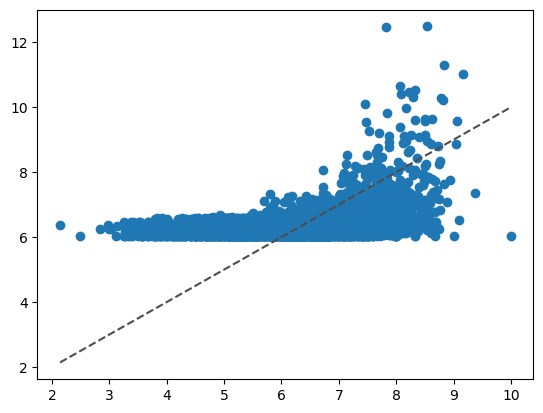

In [24]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test),max(y_test)], [min(y_test),max(y_test)], ls="--", c=".3")

In [26]:
#Classification problem

## Let's introduce a classification problem - we'll start predicting whether a person will watch a certain title or not. Since there is no such data in the dataset, I will generate it randomly.

In addition, we noticed that splitting the genre column separately into all genres is a bad idea, as the model turns out to be quite inaccurate. Therefore, each title will have only 1 genre.

the cottages will be as follows:

    Leave only one genre for anime
    Randomly distribute view statistics
    Solve the classification problem

    There is a lot of data in the dataset, for example I will only take



SyntaxError: invalid syntax (2151994626.py, line 3)

In [27]:


anime_df = anime.copy()
anime_df['genre'] = anime_df['genre'].agg(lambda x: random.choice(x.split(', ')))



In [28]:
data = pd.merge(ratings, anime_df, on='anime_id')
data = data.dropna()
data = data.drop('rating_x', axis=1)
data.rename(columns = {'rating_y':'rating'}, inplace = True)
data['watched'] = np.random.randint(2, size=data.shape[0])
data = data.sample(100000)
data

,user_id,anime_id,name,genre,type,episodes,rating,members,watched
2906697,34580,16353,Love Lab,Comedy,TV,13,7.49,79493,0
2595410,70959,9479,Coppelion,Seinen,TV,13,6.56,76291,1
5612108,31053,10779,Eroge! H mo Game mo Kaihatsu Zanmai,Hentai,OVA,6,7.68,20316,1
5948155,11369,73,Full Metal Panic! The Second Raid,Military,TV,13,8.06,155340,0
2025306,31045,249,InuYasha,Shounen,TV,167,7.89,281632,1
...,...,...,...,...,...,...,...,...,...
2903864,65559,16067,Nagi no Asukara,Drama,TV,26,8.32,224947,0
2703985,39109,11499,Sankarea,Shounen,TV,12,7.53,222657,0
7626972,39532,7266,Binkan Athlete,Hentai,OVA,1,6.46,3537,0
7694151,22461,3960,Armored Core: Fort Tower Song,Mecha,ONA,1,5.13,903,1


In [29]:
#Stage three Great, now we can start making predictions. For the purity of the experiment, we will get rid of the user_id, anime_id and name columns. In addition, we will use LabelEncoder to train our model on numerical data
data = data.drop(['user_id', 'name', 'anime_id'], axis=1)

In [30]:


# genres_one_hot = pd.get_dummies(data['genre'] , prefix='genre') <-- One Hot Encoder
# data = data.drop('genre', axis = 1)
# data = data.join(genres_one_hot)
data['type'] = labelencoder.fit_transform(data['type']) ## Лучше везде использовать One Hot Encoder, но для эксперимента применим разные инструменты
data['genre'] = labelencoder.fit_transform(data['genre'])



In [31]:
target_variable = 'watched'

In [32]:
y = data[target_variable]
X = data.drop(target_variable, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, min_samples_leaf = 5)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print("Tree accuracy =", round(accuracy_score(y_test, y_pred), 3))

Tree accuracy = 0.507


<AxesSubplot:title={'center':'Важность признаков'}>

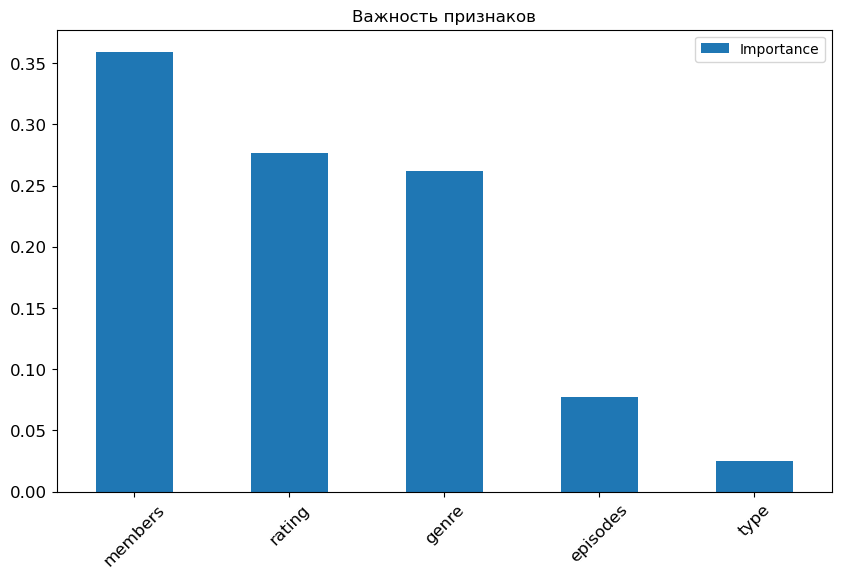

In [34]:
features = tree.feature_importances_
columns = list(X.columns)

stats = pd.DataFrame(data={'Feature': columns, 'Importance': features}, index=columns).sort_values(by='Importance', ascending=False)
stats.plot(kind='bar', title='Важность признаков', figsize=(10, 6), fontsize=12, rot=45)